# Analysis 3

###  Chi-square analysis of the distribution of critics picks:
 * across years    
 * across months
 * across critics
 * across MPAA ratings

In [1]:
# Import modules needed 
import numpy as np
import pandas as pd
import os
from sklearn import linear_model
from scipy.stats import chisquare
import seaborn as sns
sns.set(style='white',color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

# Path to the data directory into which the cleaned data is saved.
csv_file_path = os.path.join("..", "data", "cleaned_data", "movie_reviews.csv")
if not os.path.exists(csv_file_path):
    print("{} doesn't exist - perhaps the data cleaning script needs to be run?".format(csv_file_path))

In [2]:
# read movie_reviews.csv as dataframe
review_df = pd.read_csv(csv_file_path, quoting=2, parse_dates=True, infer_datetime_format=True, encoding="UTF-8")

# These don't get read back properly as dates :(
review_df['publication_date'] = pd.to_datetime(review_df['publication_date'])
review_df['date_updated'] = pd.to_datetime(review_df['date_updated'])

# See how many of these there are - this establishes the base probability of a movie being a "Critic's Pick".
print("Critic's Pick value count is:")
print(review_df['critics_pick'].value_counts())
      
# get the count for Critic's Pick 
cp_true = review_df[review_df['critics_pick'] == True]['critics_pick'].count()
cp_false = review_df[review_df['critics_pick'] == False]['critics_pick'].count()

# get probability of Critic's Pick
critics_pick_probability = cp_true / (cp_true + cp_false)
print("Critic's Pick overall probability is: ", critics_pick_probability)

Critic's Pick value count is:
False    23766
True      3127
Name: critics_pick, dtype: int64
Critic's Pick overall probability is:  0.116275610754


# Observation

The overall chance that a random movie review from the New York Times had a Critic's Pick associated with it is **11.6%**, or approximately **1 in 9**.

In [3]:
# explore the dataframe
#print(review_df.shape)
print(review_df.info())
#print(review_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26893 entries, 0 to 26892
Data columns (total 12 columns):
byline              26893 non-null object
critics_pick        26893 non-null bool
date_updated        26878 non-null datetime64[ns]
display_title       26893 non-null object
headline            26893 non-null object
mpaa_rating         26893 non-null object
opening_date        16971 non-null object
publication_date    26893 non-null datetime64[ns]
summary_short       20764 non-null object
movie_year          26893 non-null float64
movie_month         26893 non-null float64
movie_month_name    26893 non-null object
dtypes: bool(1), datetime64[ns](2), float64(2), object(7)
memory usage: 2.3+ MB
None


In [5]:
# create a year cross tab dataframe for number of True and False Critic's Pick over the years
year_crosstab_df = pd.crosstab(review_df.critics_pick, review_df.movie_year)
print(year_crosstab_df)

movie_year    1915.0  1916.0  1917.0  1921.0  1923.0  1924.0  1925.0  1926.0  \
critics_pick                                                                   
False              1       1       1       1       2      35     126     113   
True               0       0       0       0       0       0       0       0   

movie_year    1927.0  1928.0   ...    2008.0  2009.0  2010.0  2011.0  2012.0  \
critics_pick                   ...                                             
False            137     112   ...       476     461     450     529     534   
True               1       0   ...       128     120     125     171     157   

movie_year    2013.0  2014.0  2015.0  2016.0  2017.0  
critics_pick                                          
False            652     726     598     544     165  
True             160     160     185     227      45  

[2 rows x 99 columns]


In [6]:
# Function to create output data folder
def create_directory_for_output():
    current_dir = os.path.dirname('__file__')
    data_folder = os.path.join(current_dir, 'ana_3')
    if not os.path.exists(data_folder):
        os.mkdir(data_folder)
    return data_folder

output_folder = create_directory_for_output()

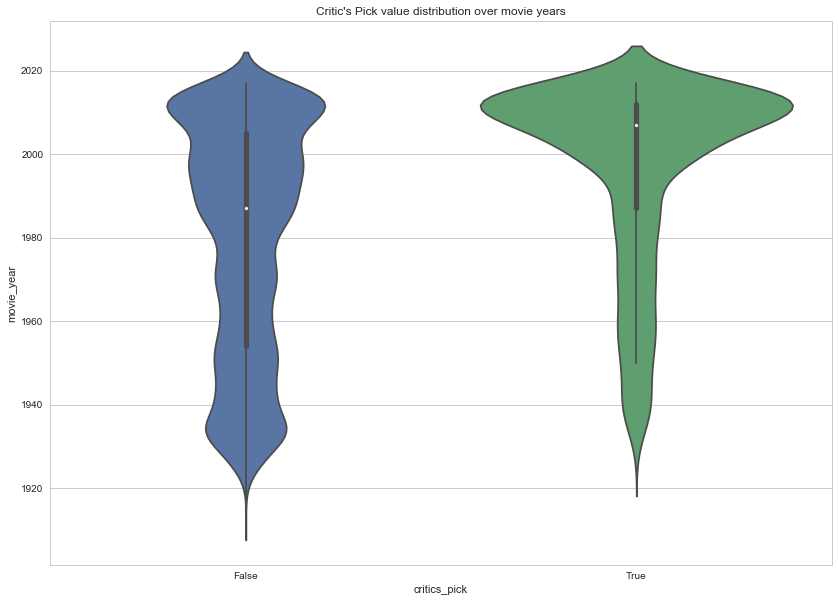

In [8]:
# plot a seaborn plot to see true and false Critic's Pick value distribution over years
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))
ax = sns.violinplot(x="critics_pick", y="movie_year", data=review_df, split=True);
plt.title("Critic's Pick value distribution over movie years")
sns.set(font_scale=1.5)

# save the plot in output folder
plot_name = 'critics_pick_value_distribution_over_movie_years.png'
plot_path = os.path.join(output_folder, plot_name)

ax.figure.savefig(plot_path, bbox_inches='tight')

In [9]:
#csv file name and path
file_name = 'years_cross_tab.csv'
file_path = os.path.join(output_folder, file_name)

#Save file to created output file
year_crosstab_df.to_csv(file_path, index = True)

In [14]:
# Calculate the chi-square value given a dataframe and Critic's Pick probability.
#
# df - dataframe to use
# cp_probability - probability that a movie is a Critic's Pick
#
# returns - observed counts, expected counts, chi-square value and p-value
def calculate_chisquare(df, cp_probability, verbose=False):
    # create lists observed and expected to hold values for observed and expected 
    observed = []
    expected = []
    for y in df.columns:
        exp = df[y].sum() * cp_probability
        obs = df[y][True]
        
        if verbose:
            print("{} -> {} vs {:.02f}".format(y, obs, exp))

        expected.append(exp)
        observed.append(obs)

    observed = np.array(observed)
    expected = np.array(expected)
    chisquare_value, pvalue = chisquare(observed, expected)
    
    return observed, expected, chisquare_value, pvalue

In [15]:
# chi square value and p value calculation
observed, expected, chisquare_value, pvalue = calculate_chisquare(year_crosstab_df, 
                                                                  critics_pick_probability, 
                                                                  verbose=True)

# display chi square value and p value for Critic's Pick value distribution over all the years
print("Chi-square value is {}".format(chisquare_value))
print("p-value is {}".format(pvalue))

1915.0 -> 0 vs 0.12
1916.0 -> 0 vs 0.12
1917.0 -> 0 vs 0.12
1921.0 -> 0 vs 0.12
1923.0 -> 0 vs 0.23
1924.0 -> 0 vs 4.07
1925.0 -> 0 vs 14.65
1926.0 -> 0 vs 13.14
1927.0 -> 1 vs 16.05
1928.0 -> 0 vs 13.02
1929.0 -> 1 vs 15.93
1930.0 -> 2 vs 17.79
1931.0 -> 3 vs 18.26
1932.0 -> 4 vs 40.81
1933.0 -> 8 vs 41.86
1934.0 -> 6 vs 42.32
1935.0 -> 8 vs 38.37
1936.0 -> 10 vs 46.74
1937.0 -> 13 vs 11.28
1938.0 -> 9 vs 10.35
1939.0 -> 13 vs 18.95
1940.0 -> 18 vs 22.44
1941.0 -> 17 vs 32.91
1942.0 -> 11 vs 28.02
1943.0 -> 9 vs 23.37
1944.0 -> 6 vs 24.19
1945.0 -> 12 vs 12.09
1946.0 -> 12 vs 10.81
1947.0 -> 13 vs 25.93
1948.0 -> 16 vs 29.30
1949.0 -> 11 vs 32.32
1950.0 -> 12 vs 18.14
1951.0 -> 7 vs 16.28
1952.0 -> 15 vs 32.32
1953.0 -> 14 vs 29.42
1954.0 -> 17 vs 26.98
1955.0 -> 18 vs 22.32
1956.0 -> 17 vs 15.81
1957.0 -> 12 vs 16.39
1958.0 -> 14 vs 23.14
1959.0 -> 18 vs 23.26
1960.0 -> 16 vs 20.35
1961.0 -> 17 vs 20.58
1962.0 -> 17 vs 15.00
1963.0 -> 10 vs 14.77
1964.0 -> 19 vs 23.84
1965.0 -> 14 vs

In [16]:
# create a month cross tab for Critic's Pick value over the movie months
month_crosstab_df = pd.crosstab(review_df.critics_pick, review_df.movie_month_name)

# Reorder into chronological order.
month_crosstab_df = month_crosstab_df[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

# display the month cross tab and explore it for columns
print(month_crosstab_df)
#print(month_crosstab_df.info())
print(month_crosstab_df.columns)

movie_month_name   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  \
critics_pick                                                                   
False             1618  1733  2206  2212  2059  1901  1681  1931  2220  2453   
True               196   212   276   248   253   257   239   249   305   325   

movie_month_name   Nov   Dec  
critics_pick                  
False             2014  1738  
True               276   291  
Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object', name='movie_month_name')


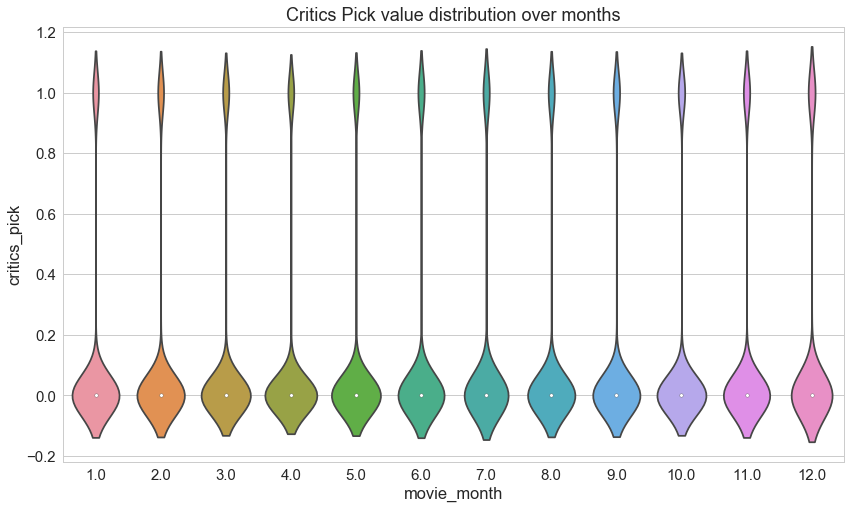

In [17]:
# plot a seaborn plot to see critics pick value distribution over movie months
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
ax = sns.violinplot(x="movie_month", y="critics_pick", data=review_df, split=True);
plt.title('Critics Pick value distribution over months')
sns.set(font_scale=1.5)

# save the plot in output folder
plot_name = 'critics_pick_value_distribution_over_movie_months.png'
plot_path = os.path.join(output_folder, plot_name)
ax.figure.savefig(plot_path, bbox_inches='tight')

In [17]:
#csv file name and path
file_name = 'month_cross_tab.csv'
file_path = os.path.join(output_folder, file_name)

#Save file to created output file
month_crosstab_df.to_csv(file_path,index = True)

In [18]:
# create lists observed and expected to hold values for observed and expected 
observed, expected, chisquare_value, pvalue = calculate_chisquare(month_crosstab_df, critics_pick_probability)

# create a dataframe to hold month, expected and observed critic pick values
se = pd.Series(observed)
month_chi_df = pd.DataFrame()
obs = pd.Series(observed)
exp = pd.Series(expected)
month_chi_df['movie_month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_chi_df['observed_critics_pick_value'] = obs.values
month_chi_df['expected_critics_pick_value'] = exp.values
month_chi_df

movie_month  observed_critics_pick_value  expected_critics_pick_value
0          Jan                          196                   210.923958
1          Feb                          212                   226.156063
2          Mar                          276                   288.596066
3          Apr                          248                   286.038002
4          May                          253                   268.829212
5          Jun                          257                   250.922768
6          Jul                          239                   223.249173
7          Aug                          249                   253.480831
8          Sep                          305                   293.595917
9          Oct                          325                   323.013647
10         Nov                          276                   266.271149
11         Dec                          291                   235.923214

In [19]:
#csv file name and path
file_name = 'critics_pick_value_over_months_observed_expected.csv'
file_path = os.path.join(output_folder, file_name)

#Save file to created output file
month_chi_df.to_csv(file_path,index = True)

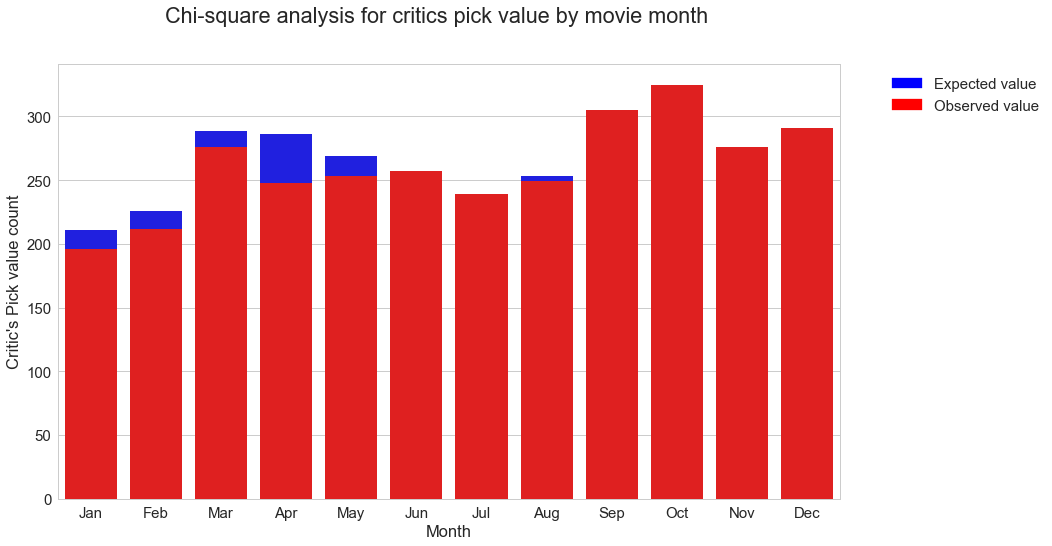

In [20]:
# Plot the chi square value distribution over month
sns.set_style("whitegrid")

# 2 Box plots to generate expected and observed chi square values over month
fig = plt.figure(figsize=(14,8))
bx = sns.barplot(x='movie_month', y='expected_critics_pick_value', data=month_chi_df, color='blue')
bx = sns.barplot(x='movie_month', y='observed_critics_pick_value', data=month_chi_df, color='red')

# To generate custom legends
expected = mpatches.Patch(color='blue', label='Expected value')
observed = mpatches.Patch(color='red', label='Observed value')

# Beautify plot
bx.legend(handles=[expected, observed], bbox_to_anchor=(1.05, 1), loc=2)
plt.suptitle('Chi-square analysis for critics pick value by movie month')
bx.set(xlabel='Month', ylabel="Critic's Pick value count")
plt.show()

# save the graph 
plot_filename = 'chi_square_analysis_critics_pick_value_by_movie_months.png'
plot_path = os.path.join(output_folder, plot_filename)
fig.savefig(plot_path, bbox_inches='tight')

In [21]:
print("Chi-square value is {}".format(chisquare_value))
print("p-value is {}".format(pvalue))

Chi-square value is 23.488343973836614
p-value is 0.015071503434154263


# Observations
    
* For chi-square value analysis for critics pick value across movie years are :
  - Chi-square value is 1430.8100324258523
  - p-value is 1.8123884999060126e-235
  
So, as per chi-square statistics, p value is < 0.05, which means that it is statistically unlikely this distribution occurred by chance.  We conclude that the number of Critic's Picks are not evenly distributed among the years.
     
*  For chi-square value analysis for critics pick value across movie months are :
  - Chi-square value is 23.488343973836614
  - p-value is 0.015071503434154263

So, as per chi-square statistics, p value is < 0.05, which means that it is statistically unlikely this distribution occurred by chance. We conclude that the number of Critic's Picks are not evenly distributed among the months.

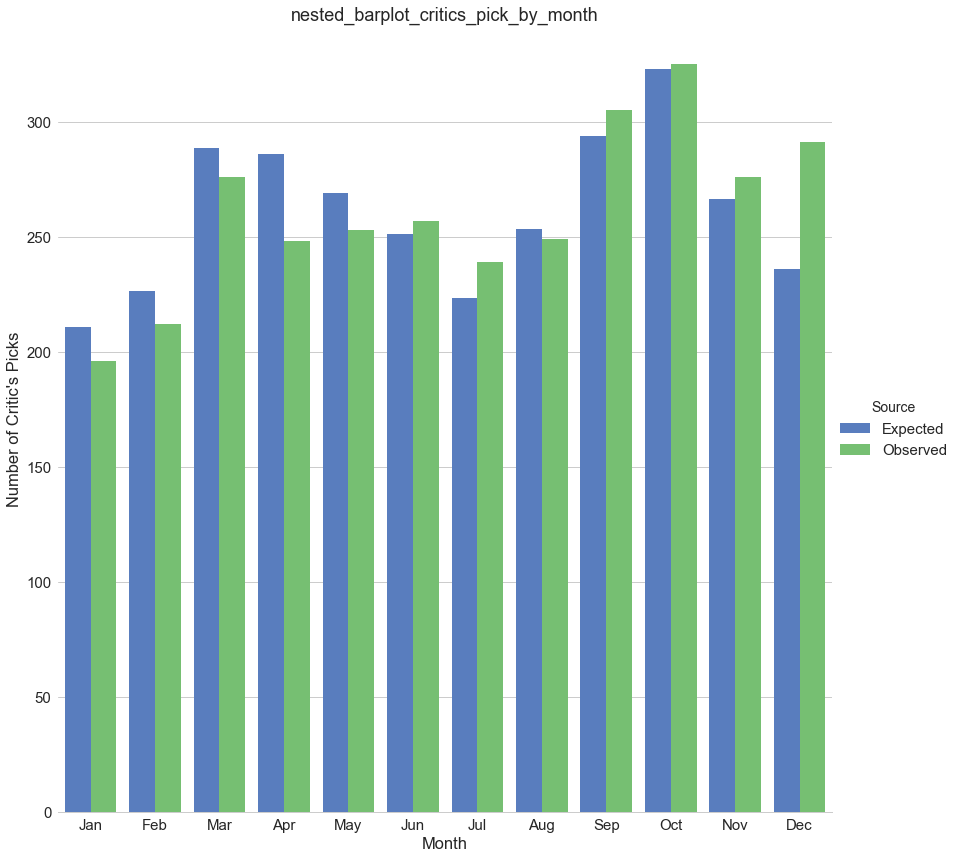

In [22]:
# Rearrange the data into a format suitable for sns.factorplot().

# Create a dataframe for the expected values, with columns [month, critics_pick, Source='Expected'].
expected_df = month_chi_df.copy()
expected_df.rename(columns={'expected_critics_pick_value':'critics_pick', 'movie_month':'month'}, inplace=True)
expected_df.drop('observed_critics_pick_value', axis=1, inplace=True)
expected_df['Source'] = 'Expected'

# Create a dataframe for the observed values, with columns [month, critics_pick, Source='Observed'].
observed_df = month_chi_df.copy()
observed_df.drop('expected_critics_pick_value', axis=1, inplace=True)
observed_df.rename(columns={'observed_critics_pick_value':'critics_pick', 'movie_month':'month'}, inplace=True)
observed_df['Source'] = 'Observed'

# Combine the 2 sub-dataframes.
month_barplot_df = pd.concat([expected_df, observed_df], axis=0)
#print(month_barplot_df.info())
#print(month_barplot_df.head(24))


# Draw a nested barplot to show Critic's Pick for month and observed/expected.
fig = plt.figure(figsize=(14,8))

factorplot = sns.factorplot(x="month", y='critics_pick', data=month_barplot_df, 
                   hue="Source", size=12, kind="bar", palette="muted")
factorplot.despine(left=True)
plt.title("nested_barplot_critics_pick_by_month")
factorplot.set_xlabels("Month")
factorplot.set_ylabels("Number of Critic's Picks")
#factorplot.set_title("Title goes here")

# save the graph 
plot_filename = 'nested_barplot_critics_pick_by_month.png'
plot_path = os.path.join(output_folder, plot_filename)
factorplot.savefig(plot_path, bbox_inches='tight')

# Observations

* The number of actual Critic's Picks is lower than expected during January through to May, and higher than expected from July to December (with the exception of August).
* The biggest discrepancy occurs during December, when the number of Critic's Picks is nearly 25% higher than expected.
* The biggest discrepancy going the other way occurs in April, when the number of Critic's Picks is 13% lower than expected.

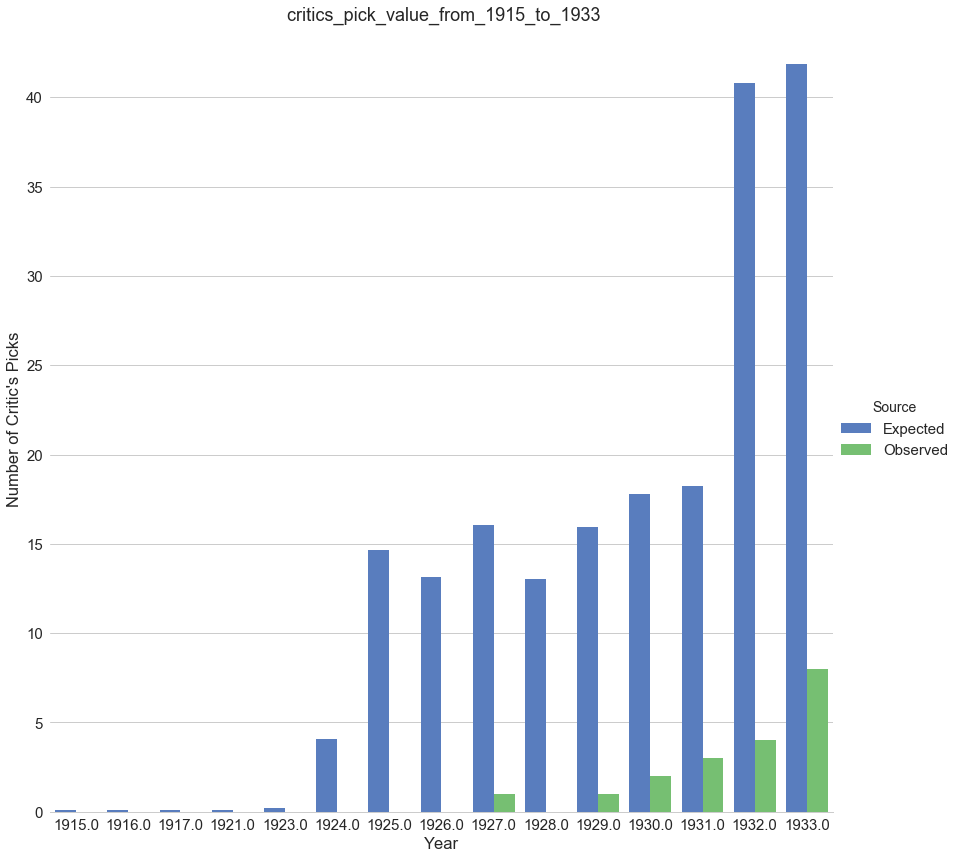

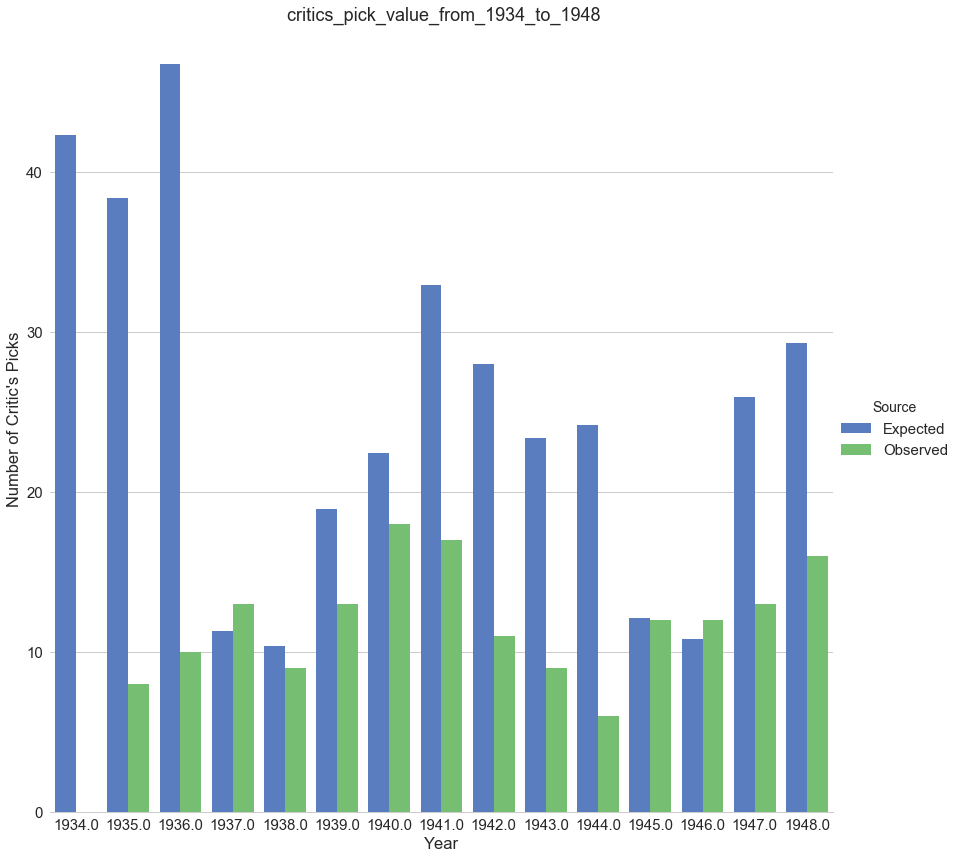

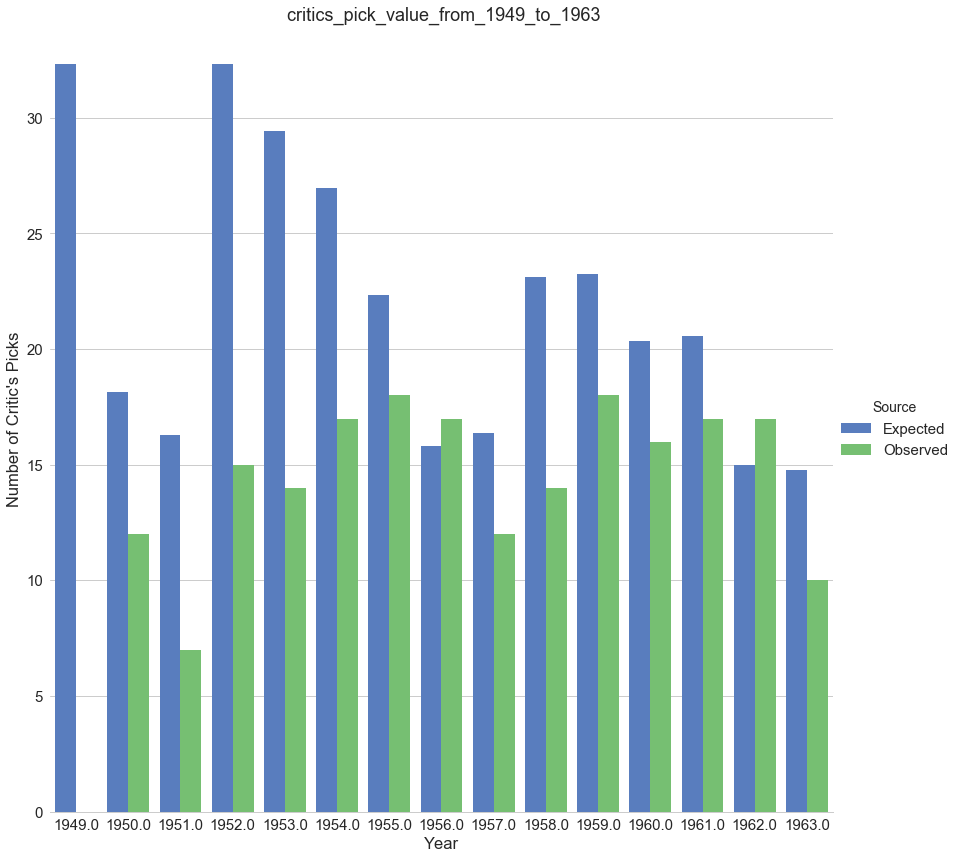

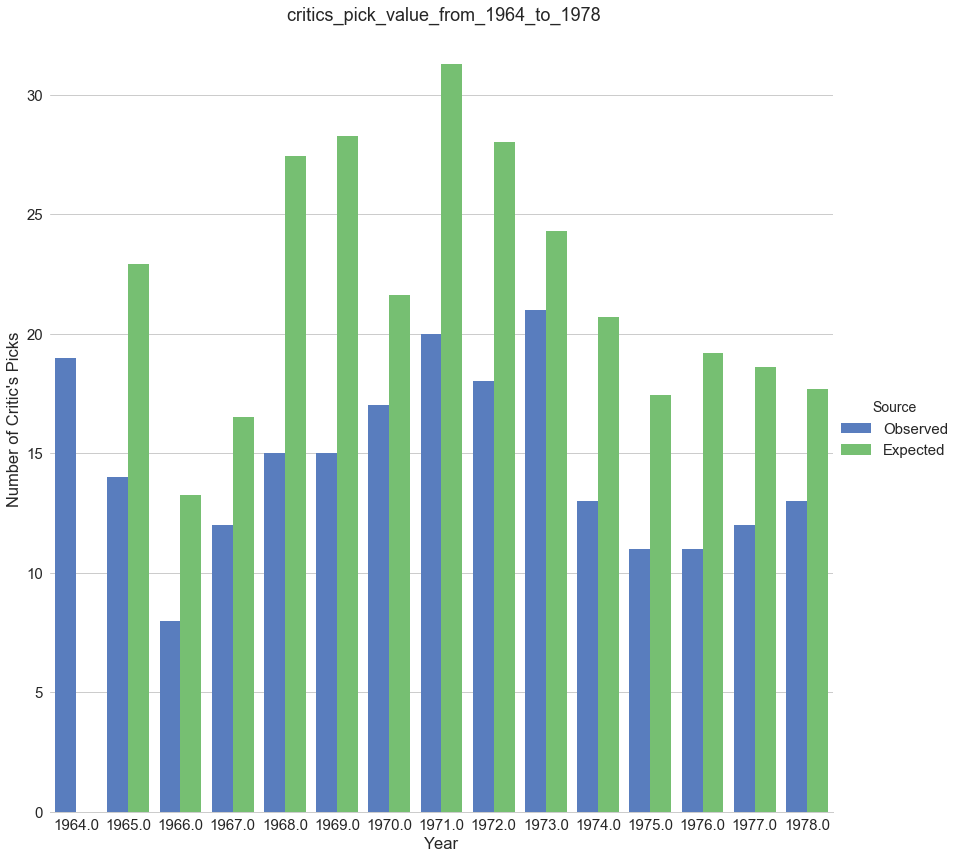

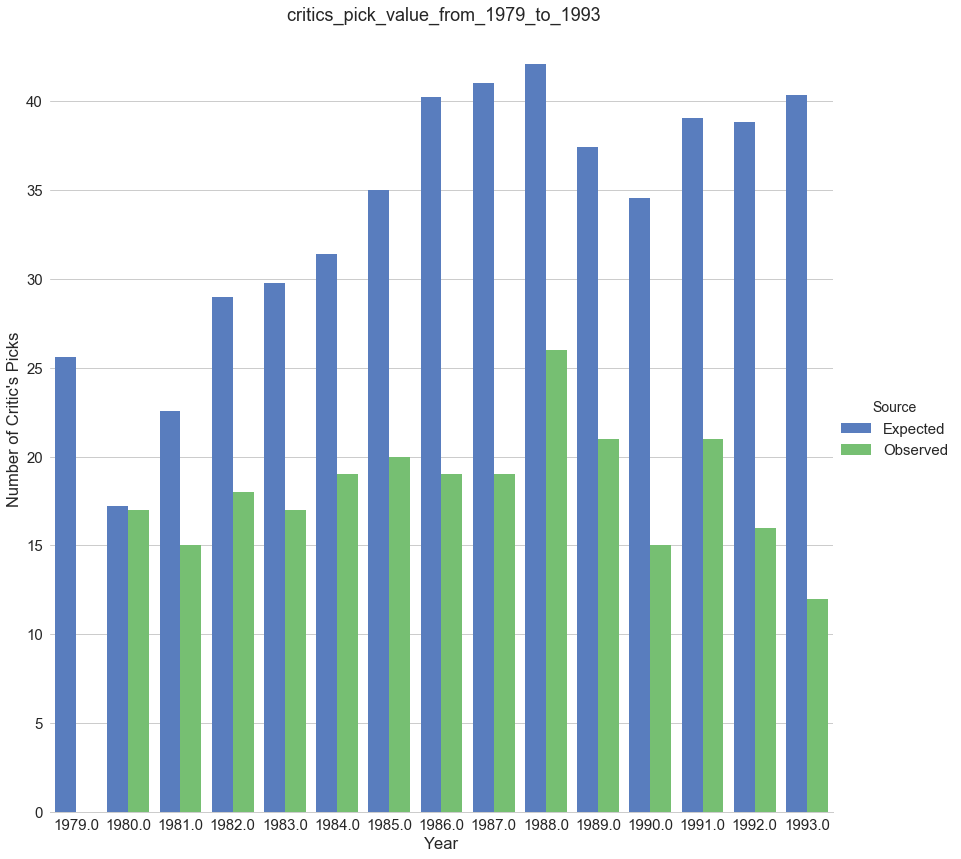

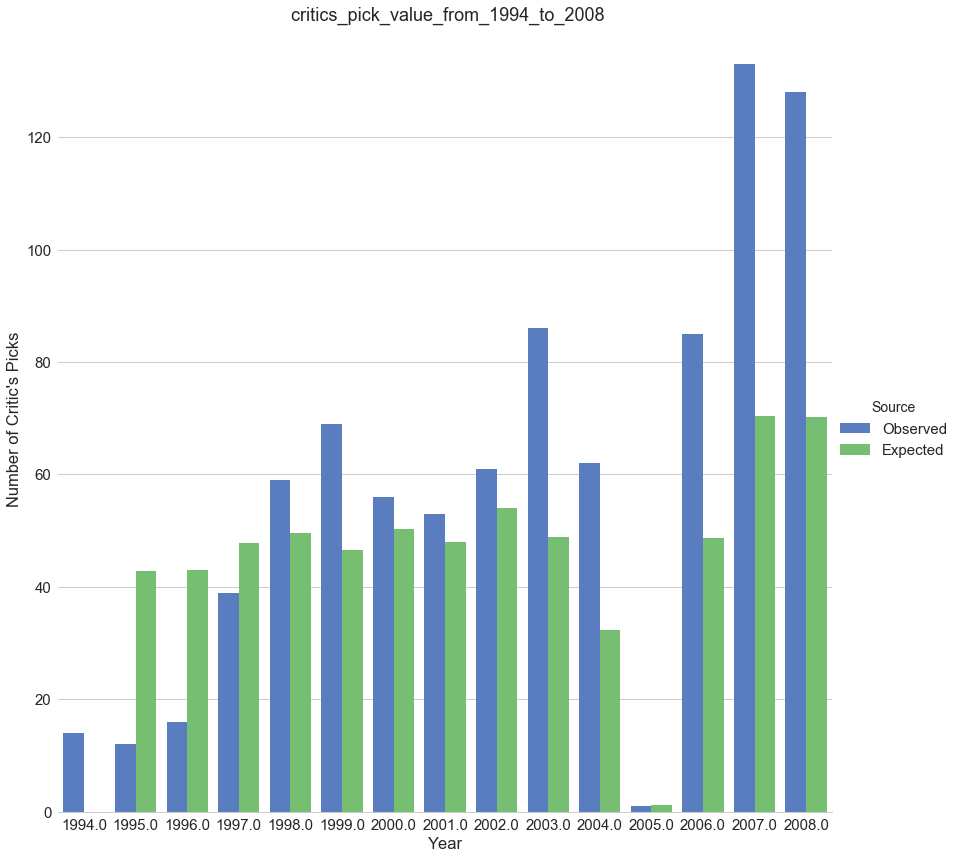

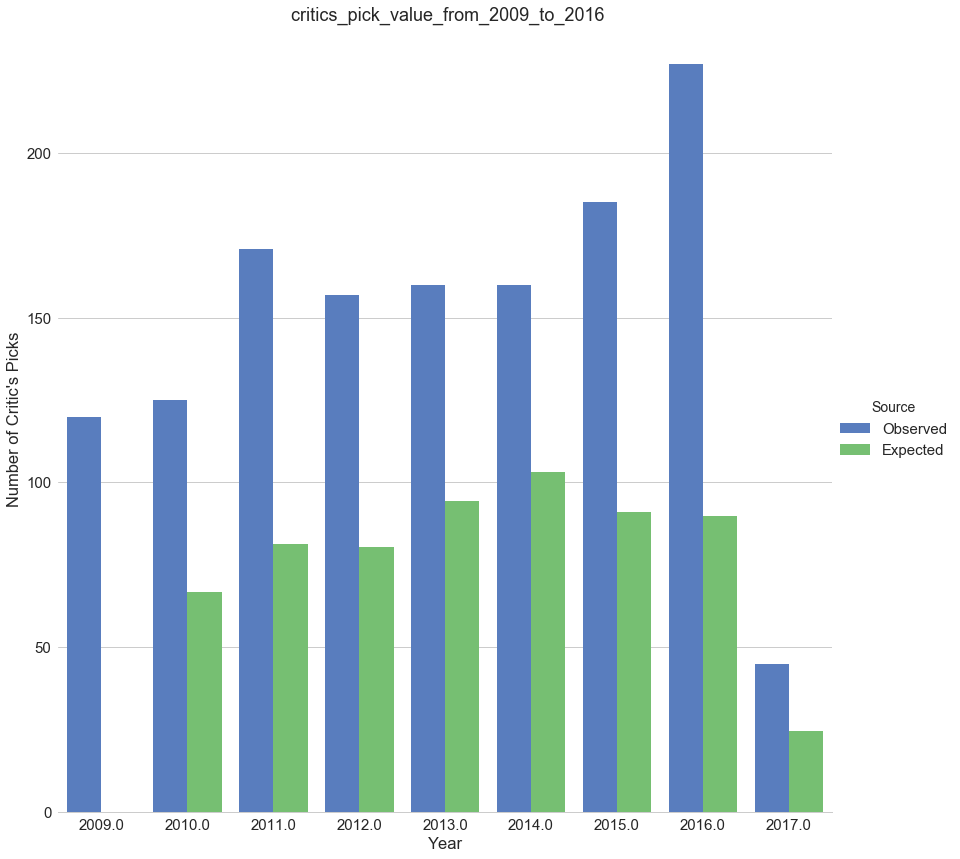

In [23]:
# Rearrange the data into a format suitable for sns.factorplot().
def create_year_factorplot_df(df, cp_probability):
    year_nested_barplot_list = []
    for y in df['movie_year'].unique():
        movie_count = df[df['movie_year'] == y].shape[0]
        cp_count = df[(df['movie_year'] == y) & (df['critics_pick'] == True)].shape[0]
        expected_count = movie_count * cp_probability

        #print("{}: {} out of {}, expected {}".format(y, cp_count, movie_count, expected_count))

        year_nested_barplot_list.append({'year':y, 'critics_pick':cp_count, 'Source':'Observed'})
        year_nested_barplot_list.append({'year':y, 'critics_pick':expected_count, 'Source':'Expected'})

    # Create a dataframe for the values, with columns [month, critics_pick, Source].
    result_df = pd.DataFrame.from_records(year_nested_barplot_list, columns=['year', 'critics_pick', 'Source'])
    result_df.sort_values('year', axis=0, ascending=True, inplace=True)
    result_df = result_df.reset_index(drop=True)

    return result_df

year_barplot_df = create_year_factorplot_df(review_df, critics_pick_probability)
#print(year_barplot_df.info())
#print(year_barplot_df.head(24))


# Draw a nested barplot to show Critic's Pick for year and observed/expected.
fig = plt.figure(figsize=(14,8))

factorplot = sns.factorplot(x="year", y='critics_pick', data=year_barplot_df[:30], 
                   hue="Source", size=12, kind="bar", palette="muted")
plt.title(" critics_pick_value_from_1915_to_1933")
factorplot.despine(left=True)
factorplot.set_xlabels("Year")
factorplot.set_ylabels("Number of Critic's Picks")

# save the graph 
plot_filename = 'critics_pick_value_from_1915_to_1933.png'
plot_path = os.path.join(output_folder, plot_filename)
factorplot.savefig(plot_path, bbox_inches='tight')

factorplot = sns.factorplot(x="year", y='critics_pick', data=year_barplot_df[31:60], 
                   hue="Source", size=12, kind="bar", palette="muted")
plt.title(" critics_pick_value_from_1934_to_1948")
factorplot.despine(left=True)
factorplot.set_xlabels("Year")
factorplot.set_ylabels("Number of Critic's Picks")

# save the graph 
plot_filename = 'critics_pick_value_from_1934_to_1948.png'
plot_path = os.path.join(output_folder, plot_filename)
factorplot.savefig(plot_path, bbox_inches='tight')

factorplot = sns.factorplot(x="year", y='critics_pick', data=year_barplot_df[61:90], 
                   hue="Source", size=12, kind="bar", palette="muted")
plt.title(" critics_pick_value_from_1949_to_1963")
factorplot.despine(left=True)
factorplot.set_xlabels("Year")
factorplot.set_ylabels("Number of Critic's Picks")

# save the graph 
plot_filename = 'critics_pick_value_from_1949_to_1960.png'
plot_path = os.path.join(output_folder, plot_filename)
factorplot.savefig(plot_path, bbox_inches='tight')

factorplot = sns.factorplot(x="year", y='critics_pick', data=year_barplot_df[91:120], 
                   hue="Source", size=12, kind="bar", palette="muted")
plt.title(" critics_pick_value_from_1964_to_1978")
factorplot.despine(left=True)
factorplot.set_xlabels("Year")
factorplot.set_ylabels("Number of Critic's Picks")

# save the graph 
plot_filename = 'critics_pick_value_from_1964_to_1978.png'
plot_path = os.path.join(output_folder, plot_filename)
factorplot.savefig(plot_path, bbox_inches='tight')

factorplot = sns.factorplot(x="year", y='critics_pick', data=year_barplot_df[121:150], 
                   hue="Source", size=12, kind="bar", palette="muted")
plt.title(" critics_pick_value_from_1979_to_1993")
factorplot.despine(left=True)
factorplot.set_xlabels("Year")
factorplot.set_ylabels("Number of Critic's Picks")

# save the graph 
plot_filename = 'critics_pick_value_from_1979_to_1993.png'
plot_path = os.path.join(output_folder, plot_filename)
factorplot.savefig(plot_path, bbox_inches='tight')

factorplot = sns.factorplot(x="year", y='critics_pick', data=year_barplot_df[151:180], 
                   hue="Source", size=12, kind="bar", palette="muted")
plt.title(" critics_pick_value_from_1994_to_2008")
factorplot.despine(left=True)
factorplot.set_xlabels("Year")
factorplot.set_ylabels("Number of Critic's Picks")

# save the graph 
plot_filename = 'critics_pick_value_from_1994_to_2008.png'
plot_path = os.path.join(output_folder, plot_filename)
factorplot.savefig(plot_path, bbox_inches='tight')

factorplot = sns.factorplot(x="year", y='critics_pick', data=year_barplot_df[181:], 
                   hue="Source", size=12, kind="bar", palette="muted")
plt.title(" critics_pick_value_from_2009_to_2016")
factorplot.despine(left=True)
factorplot.set_xlabels("Year")
factorplot.set_ylabels("Number of Critic's Picks")

# save the graph 
plot_filename = 'critics_pick_value_from_2009_to_20.png'
plot_path = os.path.join(output_folder, plot_filename)
factorplot.savefig(plot_path, bbox_inches='tight')



# Observations

* Historically, the number of Critic's Picks is consistently below the expected value until 1998, when there is a huge (relative) increase.  There appear to be 2 distinct regions here: [1914 - 1997] and [1998 onwards].
* Explanations could come from a couple of places:
  - External: did the quality of moviemaking increase dramatically from 1998 onwards, thus justifying the increased number of Critic's Picks?
  - Internal: was there an organisational change at the New York Times that caused a deliberate increase in the proportion of Critic's Picks?  Perhaps change in the movie review staff, or a change in methodology to only review "higher-quality" movies?  Or, more cynically, did the organisation have a monetary incentive to promote movies more heavily, such as an investment by the parent company into the film industry or the purchase of shares in a chain of theatres?

Let's explore the 2 regions idea by segmenting the data into:
* years up to 1998
* 1998 and onwards

In [24]:
# Pre-1998.
pre_1998_df = review_df[review_df['movie_year'] < 1998].copy()

print("Pre-1998 Critic's Pick value count is:\n{}".format(pre_1998_df['critics_pick'].value_counts()))
      
# get the count for Critic's Pick 
pre_1998_cp_true = pre_1998_df[pre_1998_df['critics_pick'] == True]['critics_pick'].count()
pre_1998_cp_false = pre_1998_df[pre_1998_df['critics_pick'] == False]['critics_pick'].count()

# get probability of Critic's Pick
pre_1998_critics_pick_probability = pre_1998_cp_true / (pre_1998_cp_true + pre_1998_cp_false)
print("Pre-1998 Critic's Pick probability is: ", pre_1998_critics_pick_probability)


# 1998 and onwards.
post_1998_df = review_df[review_df['movie_year'] >= 1998].copy()

print("Post-1998 Critic's Pick value count is:\n{}".format(post_1998_df['critics_pick'].value_counts()))
      
# get the count for Critic's Pick
post_1998_cp_true = post_1998_df[post_1998_df['critics_pick'] == True]['critics_pick'].count()
post_1998_cp_false = post_1998_df[post_1998_df['critics_pick'] == False]['critics_pick'].count()

# get probability of Critic's Pick
post_1998_critics_pick_probability = post_1998_cp_true / (post_1998_cp_true + post_1998_cp_false)
print("Post-1998 Critic's Pick probability is: ", post_1998_critics_pick_probability)

Pre-1998 Critic's Pick value count is:
False    15428
True       984
Name: critics_pick, dtype: int64
Pre-1998 Critic's Pick probability is:  0.0599561296612
Post-1998 Critic's Pick value count is:
False    8338
True     2143
Name: critics_pick, dtype: int64
Post-1998 Critic's Pick probability is:  0.204465222784


There is a huge change in the proportion of films rated as Critic's Pick pre- and post-1998.

Before 1998, 6% of films were Critic's Picks.

But then from 1998 onwards, over 20% of films were Critic's Picks.

In [25]:
# create a pre-1998 cross tab dataframe for number of True and False Critic's Pick over the years
pre_1998_crosstab_df = pd.crosstab(pre_1998_df.critics_pick, pre_1998_df.movie_year)
print(pre_1998_crosstab_df)

pre_1998_observed, pre_1998_expected, pre_1998_chisquare_value, pre_1998_pvalue = calculate_chisquare(pre_1998_crosstab_df, pre_1998_critics_pick_probability)
print("Pre-1998: chi-square = {}, pvalue = {}".format(pre_1998_chisquare_value, pre_1998_pvalue))


# create a post-1998 cross tab dataframe for number of True and False Critic's Pick over the years
post_1998_crosstab_df = pd.crosstab(post_1998_df.critics_pick, post_1998_df.movie_year)
print(post_1998_crosstab_df)

post_1998_observed, post_1998_expected, post_1998_chisquare_value, post_1998_pvalue = calculate_chisquare(post_1998_crosstab_df, post_1998_critics_pick_probability)
print("Post-1998: chi-square = {}, pvalue = {}".format(post_1998_chisquare_value, post_1998_pvalue))

movie_year    1915.0  1916.0  1917.0  1921.0  1923.0  1924.0  1925.0  1926.0  \
critics_pick                                                                   
False              1       1       1       1       2      35     126     113   
True               0       0       0       0       0       0       0       0   

movie_year    1927.0  1928.0   ...    1988.0  1989.0  1990.0  1991.0  1992.0  \
critics_pick                   ...                                             
False            137     112   ...       336     301     282     315     318   
True               1       0   ...        26      21      15      21      16   

movie_year    1993.0  1994.0  1995.0  1996.0  1997.0  
critics_pick                                          
False            335     323     356     354     372  
True              12      14      12      16      39  

[2 rows x 79 columns]
Pre-1998: chi-square = 228.1006668531061, pvalue = 1.238722835162712e-16
movie_year    1998.0  1999.0  2000.0  2001

The chi-square values are greatly reduced for each region:
* for all years the chi-square value was 1430.81, and the p-value was 1.81e-235
* pre-1998 the chi-square value is 228.10, and the p-value is 1.24e-16
* post-1998 the chi-square value is 93.51, and the p-value is 7.86e-12

But the p-value is still so small that there is a negligible chance that the Critic's Pick choices are compatible with a random selection.

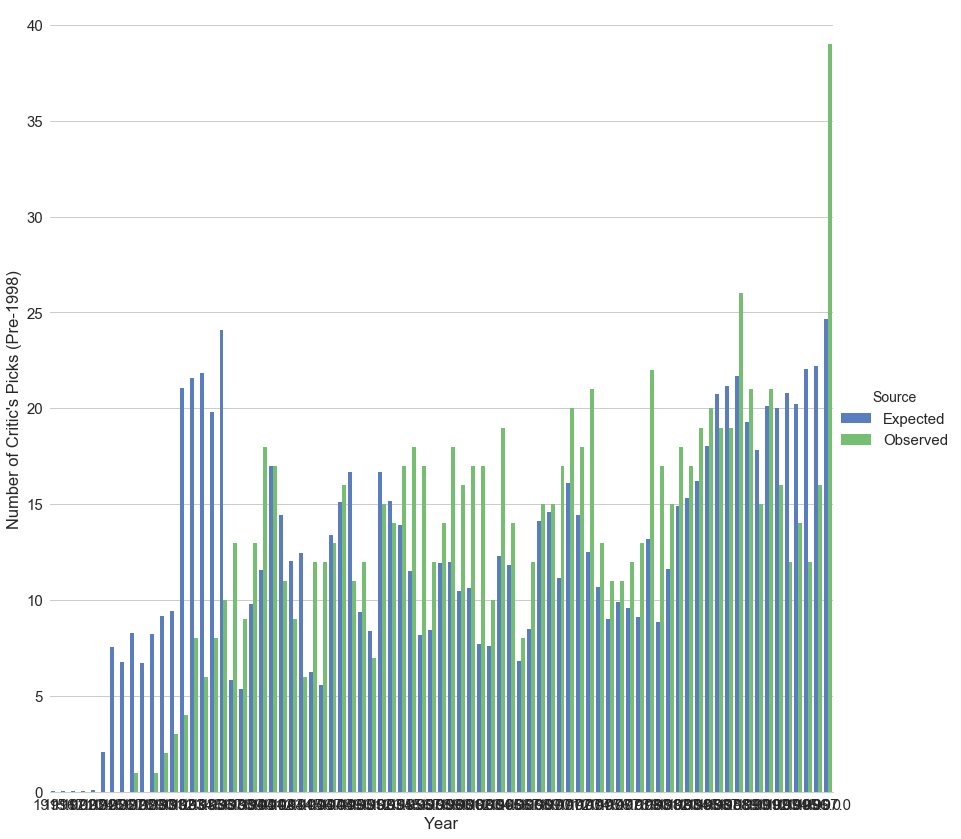

In [26]:
pre_1998_barplot_df = create_year_factorplot_df(pre_1998_df, pre_1998_critics_pick_probability)

# Draw a nested barplot to show Critic's Pick for year and observed/expected for pre-1998 movie reviews.
pre_1998_fig = plt.figure(figsize=(14,8))

pre_1998_factorplot = sns.factorplot(x="year", y='critics_pick', data=pre_1998_barplot_df, 
                                     hue="Source", size=12, kind="bar", palette="muted")
pre_1998_factorplot.despine(left=True)
pre_1998_factorplot.set_xlabels("Year")
pre_1998_factorplot.set_ylabels("Number of Critic's Picks (Pre-1998)")

# save the graph 
plot_filename = 'nested_barplot_critics_pick_by_year_pre_1998.png'
plot_path = os.path.join(output_folder, plot_filename)
pre_1998_factorplot.savefig(plot_path, bbox_inches='tight')

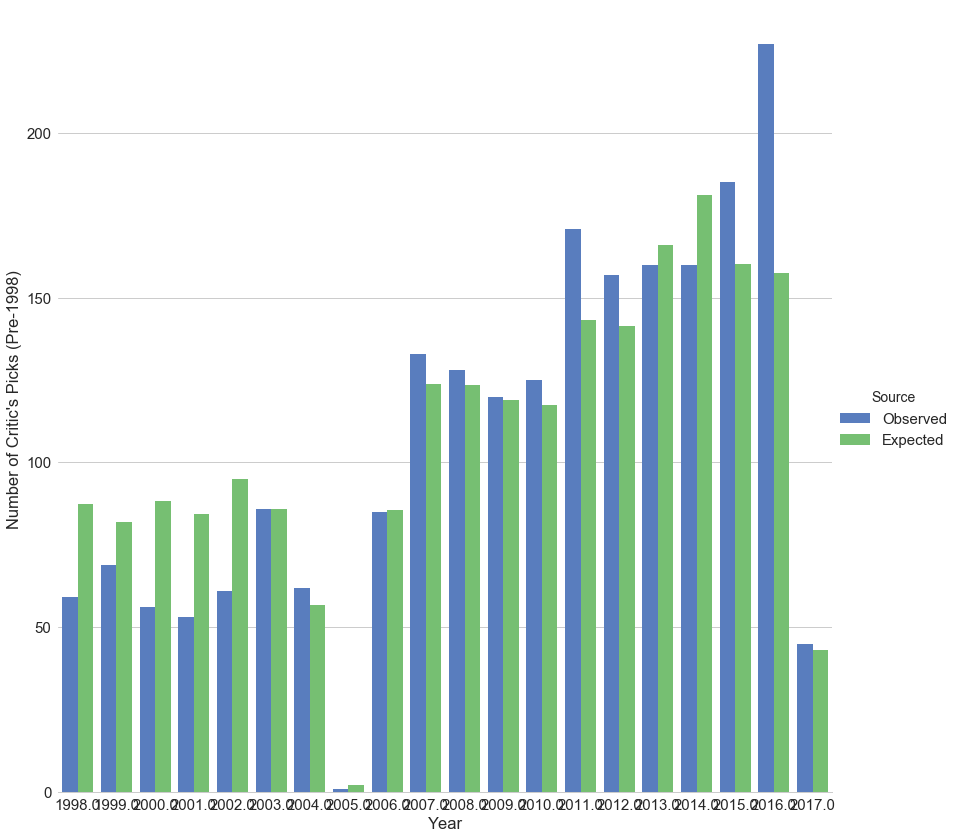

In [27]:
post_1998_barplot_df = create_year_factorplot_df(post_1998_df, post_1998_critics_pick_probability)

# Draw a nested barplot to show Critic's Pick for year and observed/expected for post-1998 movie reviews.
post_1998_fig = plt.figure(figsize=(14,8))

post_1998_factorplot = sns.factorplot(x="year", y='critics_pick', data=post_1998_barplot_df, 
                                      hue="Source", size=12, kind="bar", palette="muted")
post_1998_factorplot.despine(left=True)
post_1998_factorplot.set_xlabels("Year")
post_1998_factorplot.set_ylabels("Number of Critic's Picks (Pre-1998)")

# save the graph 
plot_filename = 'nested_barplot_critics_pick_by_year_post_1998.png'
plot_path = os.path.join(output_folder, plot_filename)
post_1998_factorplot.savefig(plot_path, bbox_inches='tight')

# Now lets do chi square analysis across critics

In [28]:
# First we need to get a list of critics who have done more than 10 reviews.
counts_df = pd.DataFrame(review_df.groupby('byline').size().rename('counts'))
counts_df.sort_values(['counts'], ascending=False, inplace=True)
top_critics_temp_df = counts_df[counts_df['counts'] >= 10]
top_critics_list = list(top_critics_temp_df.index.values)

print("Top 20 critics:")
print(top_critics_list[0:20])
print("Total number of critics with 10 or more reviews:", len(top_critics_list))

# Turns out that the top critics wrote 26484 of the 26893 reviews (> 98%).
print("Reviews written by the top critics:", top_critics_temp_df['counts'].sum())

Top 20 critics:
['Bosley Crowther', 'Stephen Holden', 'Janet Maslin', 'Vincent Canby', 'A O Scott', 'Mordaunt Hall', 'Jeannette Catsoulis', 'Manohla Dargis', 'Neil Genzlinger', 'Howard Thompson', 'Caryn James', 'Frank S Nugent', 'Elvis Mitchell', 'A H Weiler', 'Lawrence Van Gelder', 'Andy Webster', 'Nicolas Rapold', 'Roger Greenspun', 'T M P', 'A W']
Total number of critics with 10 or more reviews: 75
Reviews written by the top critics: 26467


In [29]:
# Now we can create the usual kind of dataframe.
top_critics_df = review_df[review_df['byline'].isin(top_critics_list)]
top_critics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26467 entries, 0 to 26892
Data columns (total 12 columns):
byline              26467 non-null object
critics_pick        26467 non-null bool
date_updated        26452 non-null datetime64[ns]
display_title       26467 non-null object
headline            26467 non-null object
mpaa_rating         26467 non-null object
opening_date        16699 non-null object
publication_date    26467 non-null datetime64[ns]
summary_short       20522 non-null object
movie_year          26467 non-null float64
movie_month         26467 non-null float64
movie_month_name    26467 non-null object
dtypes: bool(1), datetime64[ns](2), float64(2), object(7)
memory usage: 2.4+ MB


In [30]:
# get the count for Critic's Pick 
top_cp_true = top_critics_df[top_critics_df['critics_pick'] == True]['critics_pick'].count()
top_cp_false = top_critics_df[top_critics_df['critics_pick'] == False]['critics_pick'].count()

# get probability of Critic's Pick
top_cp_probability = top_cp_true / (top_cp_true + top_cp_false)
print("Top Critic's Pick probability is: ", top_cp_probability)

Top Critic's Pick probability is:  0.117164771225


In [31]:
# create a year cross tab dataframe for number of True and False Critic's Pick over the years
top_critics_crosstab_df = pd.crosstab(top_critics_df.critics_pick, top_critics_df.byline)
print(top_critics_crosstab_df)

byline        A D S  A H Weiler  A O Scott  A S  A W  Andre Sennwald  \
critics_pick                                                           
False           223         413       1319   19  315             225   
True              1          17        471    0    8              10   

byline        Andy Webster  Anita Gates  B C  B R C       ...        \
critics_pick                                              ...         
False                  294          146   79     60       ...         
True                    62            2    1      1       ...         

byline        Richard W Nason  Roger Greenspun  Special To The New York Times  \
critics_pick                                                                    
False                      26              326                             12   
True                        0               22                              0   

byline        Stephen Holden  T M P  T S  Thomas M Pryor  Tom Buckley  \
critics_pick                

In [32]:
# Calculate the chi-square and p values.
top_critics_observed, top_critics_expected, top_critics_chisquare_value, top_critics_pvalue = calculate_chisquare(top_critics_crosstab_df, top_cp_probability)
print("Top critics: chi-square = {}, pvalue = {}".format(top_critics_chisquare_value, top_critics_pvalue))

Top critics: chi-square = 1688.9738104239152, pvalue = 1.121251558769804e-303


## Now let's see if the Critic's Picks are consistent across MPAA ratings

All movie reviews have an MPAA rating (including 'Not Rated'), so the overall Critic's Pick probability is the same as for the full dataset, about **1 in 9**.

In [33]:
review_df['mpaa_rating'].value_counts()

Not Rated    15656
R             5948
PG-13         2477
PG            2244
G              482
X               55
NC-17           31
Name: mpaa_rating, dtype: int64

In [34]:
# create a cross tab dataframe for number of True and False Critic's Pick against MPAA ratings
ratings_crosstab_df = pd.crosstab(review_df.critics_pick, review_df.mpaa_rating)
print(ratings_crosstab_df)

mpaa_rating     G  NC-17  Not Rated    PG  PG-13     R   X
critics_pick                                              
False         428     26      14072  1989   2171  5028  52
True           54      5       1584   255    306   920   3


In [35]:
# chi square value and p value calculation
ratings_observed, ratings_expected, ratings_chisquare_value, ratings_pvalue = calculate_chisquare(ratings_crosstab_df, 
                                                                  critics_pick_probability)
print("MPAA ratings: chi-square = {}, pvalue = {}".format(ratings_chisquare_value, ratings_pvalue))

MPAA ratings: chi-square = 109.79994917608118, pvalue = 2.244792308406809e-21


# Observation

The chi-square value is considerably lower than for the top critics (1690) or years (1431).

The Critic's Picks might be more evenly distributed by MPAA rating than across the other axes, but the p-value still indicates that the discrepancy there didn't arise by chance.

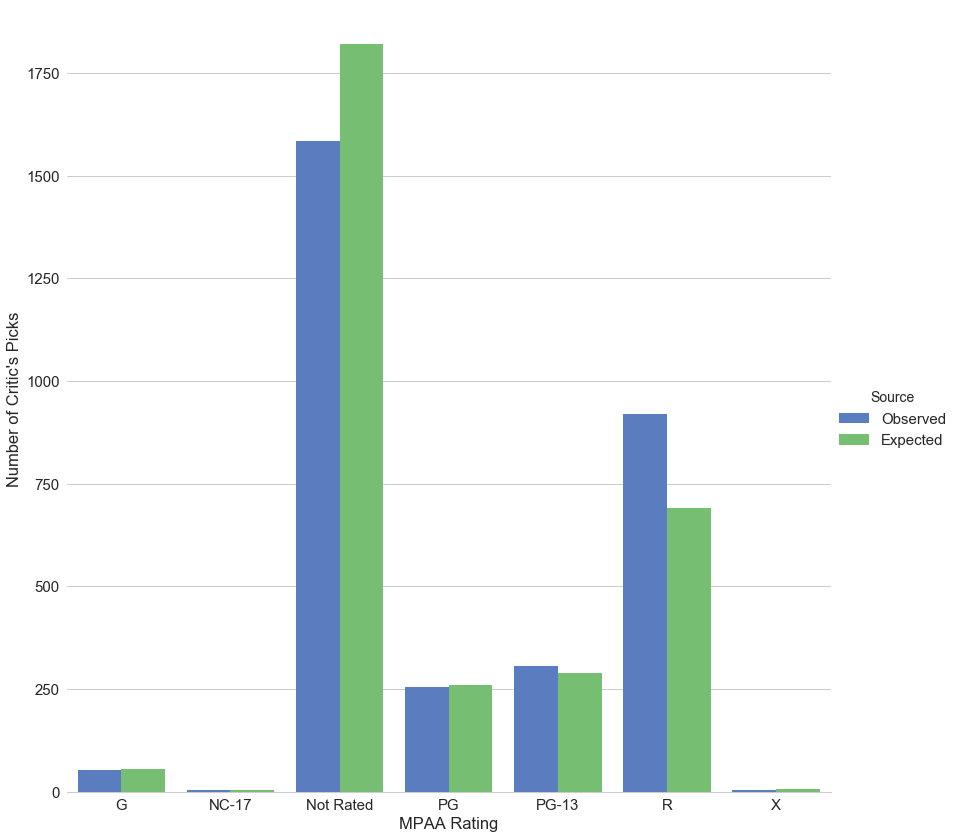

In [36]:
# Rearrange the data into a format suitable for sns.factorplot().
def create_ratings_factorplot_df(df, cp_probability, verbose=False):
    nested_barplot_list = []
    for y in df['mpaa_rating'].unique():
        movie_count = df[df['mpaa_rating'] == y].shape[0]
        cp_count = df[(df['mpaa_rating'] == y) & (df['critics_pick'] == True)].shape[0]
        expected_count = movie_count * cp_probability

        if verbose:
            print("{}: {} out of {}, expected {}".format(y, cp_count, movie_count, expected_count))

        nested_barplot_list.append({'mpaa_rating':y, 'critics_pick':cp_count, 'Source':'Observed'})
        nested_barplot_list.append({'mpaa_rating':y, 'critics_pick':expected_count, 'Source':'Expected'})

    # Create a dataframe for the values, with columns [month, critics_pick, Source].
    result_df = pd.DataFrame.from_records(nested_barplot_list, columns=['mpaa_rating', 'critics_pick', 'Source'])
    result_df.sort_values('mpaa_rating', axis=0, ascending=True, inplace=True)
    result_df = result_df.reset_index(drop=True)

    return result_df

ratings_barplot_df = create_ratings_factorplot_df(review_df, critics_pick_probability)

# Draw a nested barplot to show Critic's Pick for critic and observed/expected.
ratings_fig = plt.figure(figsize=(14,8))

ratings_factorplot = sns.factorplot(x="mpaa_rating", y='critics_pick', data=ratings_barplot_df, 
                                      hue="Source", size=12, kind="bar", palette="muted")
ratings_factorplot.despine(left=True)
ratings_factorplot.set_xlabels("MPAA Rating")
ratings_factorplot.set_ylabels("Number of Critic's Picks")

plt.show()

# save the graph 
plot_filename = 'nested_barplot_critics_pick_by_mpaa_rating.png'
plot_path = os.path.join(output_folder, plot_filename)
ratings_factorplot.savefig(plot_path, bbox_inches='tight')

# Observations

The expected and observed values are very good for **G**, **NC-17**, **PG**, **PG-13** and **X** rated movies.

There are fewer Critic's Picks for **Not Rated** movies than expected, and more than expected for **R** rated movies.

## Speculation

* **Not Rated** movies probably cover many independent and film festival type movies, and as such their overall quality could be less than bigger budget movies from major studios.
* **R** rated movies can cover grittier material, so perhaps it is more likely that the emotionally moving and realistic movies that a critic would recommend highly are rated **R**.

At any rate, the discrepancy between observed and expected numbers of Critic's Picks is not as great across MPAA ratings as it is across critics and years.